In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [39]:
from IPython.display import Image

## Preguntas de investigación
1. ¿Qué relación existe entre el número de suscriptores y la cantidad de visualizaciones del canal?
    + ¿Muchos suscriptores se traduce en muchas visualizaciones?
    + Sería muy interesante saber si los que visualizan el contenido son todos suscriptores.
2. ¿La categoría del canal influye en la cantidad de suscriptores y las visualizaciones?
3. ¿La fecha de inicio del canal determina la cantidad de suscriptores?

### Procedimiento
1. Realizar operaciones de análisis de datos en el DataFrame del tipo:
    + Ordenar los canales por número de suscriptores de mayor a menor. (Hecho)
    + Encontrar el promedio, la mediana y la desviación estándar del número de suscriptores de los canales. (Hecho)
    + Filtrar los canales que tienen más de cierto número de suscriptores. (Hecho)
    + Agrupar los canales por categoría y encontrar el número promedio de suscriptores por grupo. (Hecho)
    + Según la cantidad de canales ¿cuál es la categoría que más repite? (Hecho)
    + ¿Cuáles son las categorías que agrupan los canales más bajos? (Hecho)
    + Encontrar los canales que tienen un crecimiento de suscriptores más rápido en un período de tiempo específico.
    + ¿Existe una relación entre canales con más suscriptores y la fecha de inicio?
    + ¿La fecha correlaciona con las categorías?

In [5]:
# Importar dataset limpio
df_canales = pd.read_csv('C:\\Users\\Joako\\Desktop\\canales_youtube_suscriptores\\Datos_limpios\\canales_sin_na.csv')

In [6]:
df_canales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         971 non-null    int64 
 1   youtuber     971 non-null    object
 2   subscribers  971 non-null    int64 
 3   video_views  971 non-null    int64 
 4   video_count  971 non-null    int64 
 5   category     971 non-null    object
 6   started      971 non-null    object
dtypes: int64(4), object(3)
memory usage: 53.2+ KB


In [7]:
# Ordenar los canales por número de suscriptores de mayor a menor
df_canales_sorted = df_canales.sort_values('subscribers', ascending=False)
print(df_canales_sorted)

     rank                    youtuber  subscribers   video_views  video_count   
0       1                    T-Series    222000000  198459090822        17317  \
1       3  Cocomelon - Nursery Rhymes    140000000  135481339848          786   
2       4                   SET India    139000000  125764252686        91271   
3       6                   PewDiePie    111000000   28469458228         4497   
4       7                     MrBeast    102000000   16832456681          726   
..    ...                         ...          ...           ...          ...   
966   996                    JP Plays     10900000    4609300218         3528   
967   997               TrapMusicHDTV     10900000    4070521973          690   
968   998                 Games EduUu     10900000    3093784767         1006   
969   999                       Hueva     10900000    3040301750          831   
970  1000              Dobre Brothers     10900000    2808411693          590   

           category     sta

In [8]:
df_canales_sorted.describe()

,rank,subscribers,video_views,video_count
count,971.000000,9.710000e+02,9.710000e+02,971.000000
mean,500.895984,2.023769e+07,9.325896e+09,8794.880536
std,287.079648,1.479116e+07,1.218934e+10,29761.056992
min,1.000000,1.090000e+07,4.390980e+05,1.000000
25%,252.500000,1.270000e+07,3.640473e+09,348.500000
50%,501.000000,1.550000e+07,6.165984e+09,908.000000
75%,747.500000,2.200000e+07,1.151038e+10,3160.500000
max,1000.000000,2.220000e+08,1.984591e+11,329711.000000


#### insight:
A partir de la media suscriptores = 20,237,690. La desviación estandar de suscriptores = 14,791,160 y la mediana de = 15,500,000. Se puede afirmar que
que la distribución de suscriptores en los canales es bastante heterogénea, Es decir hay muchos canales con muchos suscriptores y muchos con pocos suscriptores en relación a la media. No todos los 971 canales se agrupan en torno a la media. 
Adicionalmente esta heterogeneidad sugiere que la media esta siendo afectada por valores extremos y más bien entorno al 50% de los canales tienen unos 15,500,000 y el 75% de los canales tiene alrededor de 22,000,000 de suscriptores. 

Acciones: 
* Construir una escala para precisar cuales son los canales más top y aquellos que no lo son 

In [12]:
# escala de relevancia según suscriptores
p90 = np.percentile(df_canales_sorted['subscribers'], 90)
p75 = np.percentile(df_canales_sorted['subscribers'], 75)
p50 = np.percentile(df_canales_sorted['subscribers'], 50)
p25 = np.percentile(df_canales_sorted['subscribers'], 25)
p10 = np.percentile(df_canales_sorted['subscribers'], 10)

def categorizar(subs):
    if subs >= p90:
        return 'toptop'
    elif subs >= p75:
        return 'top'
    elif subs >= p50:
        return 'importantes'
    elif subs >= p25:
        return 'buenos'
    else:
        return 'normal'

df_canales_sorted['relevancia'] = df_canales_sorted['subscribers'].apply(categorizar)


In [13]:
df_canales_sorted.sample(10)

,rank,youtuber,subscribers,video_views,video_count,category,started,relevancia
169,177,DanTDM,26200000,18809615646,3603,Gaming,2012-01-01,top
270,281,Canal Canalha,20700000,1834293432,291,Comedy,2011-01-01,importantes
941,969,BakLol Video,11100000,3250851179,257,Entertainment,2016-01-01,normal
824,848,Planet Earth INDIA,11900000,1722795279,630,People & Blogs,2011-01-01,normal
331,345,Ninja Kidz TV,18700000,9145485770,267,Entertainment,2017-01-01,importantes
241,251,Venus Movies,22100000,6293790011,2456,Entertainment,2010-01-01,top
925,951,Fortnite,11200000,2123231155,792,Gaming,2014-01-01,normal
800,822,Más SKabeche,12100000,2746045885,632,Travel & Events,2015-01-01,normal
837,861,E-MasterSensei,11800000,3235532845,1151,Gaming,2016-01-01,normal
143,150,ashish chanchlani vines,28600000,4054589048,147,Comedy,2009-01-01,top


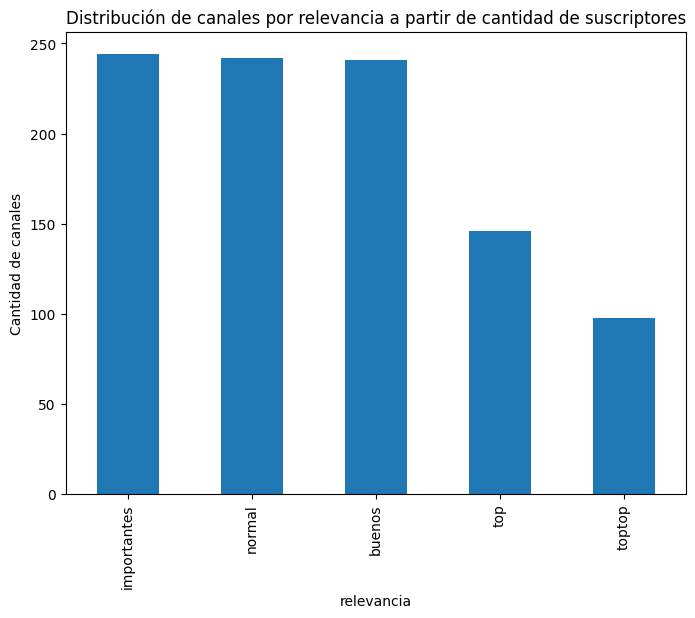

In [15]:
# Construir gráfico

df_canales_sorted['relevancia'].value_counts().plot(kind='bar', figsize=(8, 6))

# Personalizar la gráfica
plt.title('Distribución de canales por relevancia a partir de cantidad de suscriptores')
plt.xlabel('relevancia')
plt.ylabel('Cantidad de canales')
plt.show()


Para el cálculo estadístico de las categorías asignarles un puntaje, que puede ser por escala de presencia 

In [17]:
# Agrupar los canales por país o categoría y encontrar el número promedio de suscriptores por grupo.
frecuency_category = df_canales_sorted.groupby('category')['subscribers'].mean()
print(frecuency_category)

category
Autos & Vehicles         1.670000e+07
Comedy                   1.783968e+07
Education                2.339565e+07
Entertainment            1.880871e+07
Film & Animation         2.115400e+07
Gaming                   1.864510e+07
Howto & Style            1.741556e+07
Movies                   2.215000e+07
Music                    2.303739e+07
News & Politics          1.810741e+07
Nonprofits & Activism    2.385000e+07
People & Blogs           1.897563e+07
Pets & Animals           1.340000e+07
Science & Technology     1.667222e+07
Shows                    3.438571e+07
Sports                   2.594000e+07
Trailers                 3.560000e+07
Travel & Events          1.210000e+07
Name: subscribers, dtype: float64


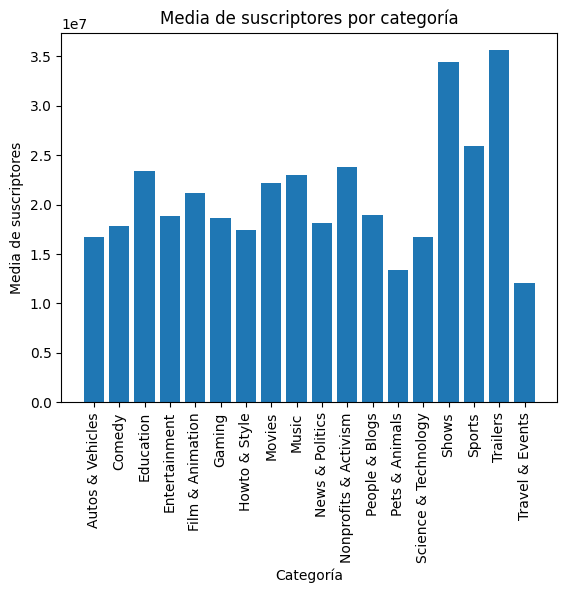

In [19]:
# Gráfico de media de suscriptores por categoría
plt.bar(frecuency_category.index, frecuency_category.values)
plt.title('Media de suscriptores por categoría')
plt.xlabel('Categoría')
plt.ylabel('Media de suscriptores')
plt.xticks(rotation=90)
plt.show()

#### insight:
Los canales con la media más alta de suscriptores son de categorías 'Shows', 'Sports' y 'Trailers' seguidos de 'Education', 'Music', 'Nonprofits & Activism', 'Movies', y 'Film & Animation' y en un tercer nivel el resto de las categorías. Ésto nos indica que existen al menos tres niveles de preferencia para las categorías que agrupan los canales de más suscriptores. 'Preferencia_Alta', 'Preferencia_Media' y 'Preferencia_baja'

In [22]:
# Según la cantidad de canales ¿cuál es la categoría que más repite?
frecuency_category_canal = df_canales_sorted.groupby('category')['youtuber'].count()
print(frecuency_category_canal)

category
Autos & Vehicles           1
Comedy                    63
Education                 46
Entertainment            241
Film & Animation          50
Gaming                   102
Howto & Style             45
Movies                     2
Music                    222
News & Politics           27
Nonprofits & Activism      2
People & Blogs           119
Pets & Animals             6
Science & Technology      18
Shows                     14
Sports                    10
Trailers                   2
Travel & Events            1
Name: youtuber, dtype: int64


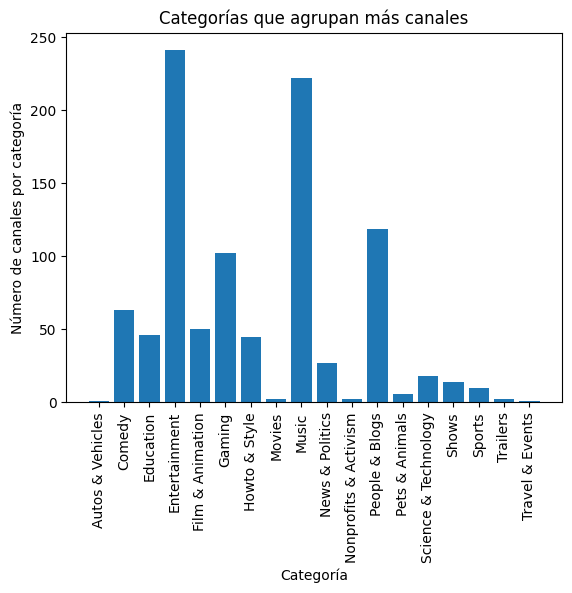

In [23]:
# Grafico de categorías que agrupan más canales
plt.bar(frecuency_category_canal.index, frecuency_category_canal.values)
plt.title('Categorías que agrupan más canales')
plt.xlabel('Categoría')
plt.ylabel('Número de canales por categoría')
plt.xticks(rotation=90)
plt.show()

In [35]:
frecuency_category_canal.to_csv('frecuencia_categorias_canales.csv', index=False)

In [36]:
df_canales_sorted.to_csv('df_ordenado.csv', index=False)

#### insight:
Las categorías que más canales agrupan son por mucho 'Entertainment' y 'Music' seguidas por 'Comedy', 'Gaming' y 'People & Blogs'. El resto de categorías están por debajo de los 50 canales aprox. Lo cuál parece no mostrar una relación entre la mayor cantidad de suscriptores y la existencia o crecimiento de canales en las categorías que agrupan más sucriptores. Incluso se puede destacar que las categorías que menos canales tienen son: 'Movies', 'Nonprofits & Activism', 'Travel & Events', 'Trailers', 'Science & Technology', 'Shows', 'Sports'; muchas de ellas siendo las que más sucriptores agrupan en promedio

In [72]:
# Escala de popularidad de las categorías a partir de la cantidad de youtubers que tiene
def clasificar_categorias(n_youtuber):
    if n_youtuber <= 25:
        return 'Nicho'
    elif n_youtuber <= 50:
        return 'Especializadas'
    elif n_youtuber <= 150:
        return 'Populares'
    else:
        return 'Muy populares'
    
df_canales_sorted.set_index('category', inplace=True)

df_canales_sorted['cantidad_youtubers'] = df_canales_sorted.groupby(level=0)['youtuber'].apply(lambda x: clasificar_categorias(len(x)))


In [73]:
df_canales_sorted.sample(3)

,rank,youtuber,subscribers,video_views,video_count,started,relevancia,cantidad_youtubers
category,,,,,,,,
Music,757,7 Minutoz,12600000,3916931694,511,2012-01-01,normal,Muy populares
Music,38,El Reino Infantil,51700000,49895247456,1309,2011-01-01,toptop,Muy populares
Music,125,Bollywood Classics,30600000,19244430138,2008,2012-01-01,top,Muy populares


In [78]:
pivot = df_canales_sorted.pivot_table(
    index='category',
    columns='cantidad_youtubers',
    values= 'youtuber',
    aggfunc= 'count'
)
print(pivot)

cantidad_youtubers     Especializadas  Muy populares  Nicho  Populares
category                                                              
Autos & Vehicles                  NaN            NaN    1.0        NaN
Comedy                            NaN            NaN    NaN       63.0
Education                        46.0            NaN    NaN        NaN
Entertainment                     NaN          241.0    NaN        NaN
Film & Animation                 50.0            NaN    NaN        NaN
Gaming                            NaN            NaN    NaN      102.0
Howto & Style                    45.0            NaN    NaN        NaN
Movies                            NaN            NaN    2.0        NaN
Music                             NaN          222.0    NaN        NaN
News & Politics                  27.0            NaN    NaN        NaN
Nonprofits & Activism             NaN            NaN    2.0        NaN
People & Blogs                    NaN            NaN    NaN      119.0
Pets &

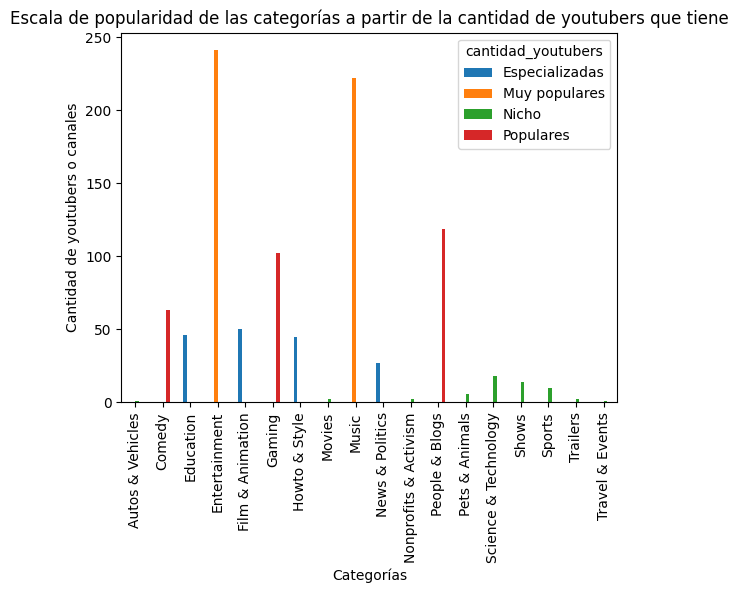

In [80]:
# Grafico de escala de popularidad de las categorías a partir de la cantidad de youtubers que tiene
pivot.plot(kind='bar')
plt.title('Escala de popularidad de las categorías a partir de la cantidad de youtubers que tiene')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de youtubers o canales')
plt.xticks(rotation=90)
plt.show()